In [1]:
# import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import Dataset
import warnings
warnings.filterwarnings('ignore')
churn=pd.read_csv("Churn.csv")
churn.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.mins eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4        99       16.78       244.7           91         11.01   
1    195.5       103       16.62       254.4          103         11.45   
2    121.2       110       10.30       162.6          104          7.32   
3     61.9        88        5.26       196.9           89          8.86   
4    148.3       122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1     no  
1               1     no  
2               0     no  
3               2     no  
4               3     no  

[5 rows x 21 columns]

# EDA (Exploratory Data Analysis)

In [3]:
churn1= churn.iloc[:, 1:]
churn1

state      area.code  account.length voice.plan  voice.messages  \
0       KS  area_code_415             128        yes              25   
1       OH  area_code_415             107        yes              26   
2       NJ  area_code_415             137         no               0   
3       OH  area_code_408              84         no               0   
4       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4995    HI  area_code_408              50        yes              40   
4996    WV  area_code_415             152         no               0   
4997    DC  area_code_415              61         no               0   
4998    DC  area_code_510             109         no               0   
4999    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0           no       10.0           3         2.70     265.1        110   
1           no       13.7           3         3.70     161.6        123   
2           no       12.2           5         3.29     243.4        114   
3          yes        6.6           7         1.78     299.4         71   
4          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4995        no        9.9           5         2.67     235.7        127   
4996        no       14.7           2         3.97     184.2         90   
4997        no       13.6           4         3.67     140.6         89   
4998        no        8.5           6         2.30     188.8         67   
4999        no        9.3          16         2.51     129.4        102   

     day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0         45.07    197.4         99       16.78       244.7           91   
1         27.47    195.5        103       16.62       254.4          103   
2         41.38    121.2        110       10.30       162.6          104   
3          50.9     61.9         88        5.26       196.9           89   
4         28.34    148.3        122       12.61       186.9          121   
...         ...      ...        ...         ...         ...          ...   
4995      40.07      223        126       18.96       297.5          116   
4996      31.31    256.8         73       21.83       213.6          113   
4997       23.9    172.8        128       14.69       212.4           97   
4998       32.1    171.7         92       14.59       224.4           89   
4999         22    267.1        104       22.70       154.8          100   

      night.charge  customer.calls churn  
0            11.01               1    no  
1            11.45               1    no  
2             7.32               0    no  
3             8.86               2    no  
4             8.41               3    no  
...            ...             ...   ...  
4995         13.39               2    no  
4996          9.61               3   yes  
4997          9.56               1    no  
4998         10.10               0    no  
4999          6.97               0    no  

[5000 rows x 20 columns]

In [38]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [5]:
churn2=churn1.rename(columns={"day.charge":'day_charge',"eve.mins":'eve_mins',"account.length":"account_length"
                              ,"voice.plan":"voice_plan","intl.mins":"intl_mins","voice.messages":"voice_messages",
                              "intl.plan":'intl_plan',"intl.mins":"intl.mins","intl.calls":'intl_calls','intl.charge':'intl_charge',
                              'day.mins':"day_mins","day.calls":'day_calls','eve.calls':'eve_calls','eve.charge':'eve_charge',
                              'night.mins':'night_mins','night.calls':'night_calls','night.charge':'night_charge',
                              'night.charge':'night_charge',"customer.calls":"customer_calls"})
churn2.head()

state      area.code  account_length voice_plan  voice_messages intl_plan  \
0    KS  area_code_415             128        yes              25        no   
1    OH  area_code_415             107        yes              26        no   
2    NJ  area_code_415             137         no               0        no   
3    OH  area_code_408              84         no               0       yes   
4    OK  area_code_415              75         no               0       yes   

   intl.mins  intl_calls  intl_charge  day_mins  day_calls day_charge  \
0       10.0           3         2.70     265.1        110      45.07   
1       13.7           3         3.70     161.6        123      27.47   
2       12.2           5         3.29     243.4        114      41.38   
3        6.6           7         1.78     299.4         71       50.9   
4       10.1           3         2.73     166.7        113      28.34   

  eve_mins  eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0    197.4         99       16.78       244.7           91         11.01   
1    195.5        103       16.62       254.4          103         11.45   
2    121.2        110       10.30       162.6          104          7.32   
3     61.9         88        5.26       196.9           89          8.86   
4    148.3        122       12.61       186.9          121          8.41   

   customer_calls churn  
0               1    no  
1               1    no  
2               0    no  
3               2    no  
4               3    no

In [6]:
churn2.day_charge.values
churn2.eve_mins.values

array(['197.4', '195.5', '121.2', ..., '172.8', '171.7', '267.1'],
      dtype=object)

In [7]:
churn2['day_charge'] = churn2['day_charge'].astype(float)
churn2['eve_mins'] = churn2['eve_mins'].astype(float)

In [39]:
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   int64  
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   int64  
 6   intl.mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   float64
 12  eve_mins        5000 non-null   float64
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

In [40]:
churn2.describe()

account_length   voice_plan  voice_messages    intl_plan    intl.mins  \
count      5000.00000  5000.000000     5000.000000  5000.000000  5000.000000   
mean        100.25860     0.264600        7.755200     0.094600    10.261780   
std          39.69456     0.441164       13.546393     0.292691     2.761396   
min           1.00000     0.000000        0.000000     0.000000     0.000000   
25%          73.00000     0.000000        0.000000     0.000000     8.500000   
50%         100.00000     0.000000        0.000000     0.000000    10.300000   
75%         127.00000     1.000000       17.000000     0.000000    12.000000   
max         243.00000     1.000000       52.000000     1.000000    20.000000   

        intl_calls  intl_charge     day_mins    day_calls   day_charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      4.435200     2.771196   180.288900   100.029400    30.653501   
std       2.456788     0.745514    53.894699    19.831197     9.159936   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.300000   143.700000    87.000000    24.430000   
50%       4.000000     2.780000   180.100000   100.000000    30.625000   
75%       6.000000     3.240000   216.200000   113.000000    36.750000   
max      20.000000     5.400000   351.500000   165.000000    59.760000   

          eve_mins    eve_calls   eve_charge   night_mins  night_calls  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    200.580326   100.191000    17.054322   200.391620    99.919200   
std      50.433135    19.826496     4.296843    50.527789    19.958686   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     166.600000    87.000000    14.140000   166.900000    87.000000   
50%     200.800000   100.000000    17.090000   200.400000   100.000000   
75%     233.900000   114.000000    19.900000   234.700000   113.000000   
max     363.700000   170.000000    30.910000   395.000000   175.000000   

       night_charge  customer_calls        churn  
count   5000.000000     5000.000000  5000.000000  
mean       9.017732        1.570400     0.141400  
std        2.273763        1.306363     0.348469  
min        0.000000        0.000000     0.000000  
25%        7.510000        1.000000     0.000000  
50%        9.020000        1.000000     0.000000  
75%       10.560000        2.000000     0.000000  
max       17.770000        9.000000     1.000000

In [41]:
churn2[churn2.duplicated()]

Empty DataFrame
Columns: [state, area.code, account_length, voice_plan, voice_messages, intl_plan, intl.mins, intl_calls, intl_charge, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, customer_calls, churn]
Index: []

In [42]:
churn2.corr()

account_length  voice_plan  voice_messages  intl_plan  \
account_length        1.000000   -0.006650       -0.014575   0.014681   
voice_plan           -0.006650    1.000000        0.954508   0.009054   
voice_messages       -0.014575    0.954508        1.000000   0.011947   
intl_plan             0.014681    0.009054        0.011947   1.000000   
intl.mins             0.001291    0.004116        0.002463   0.031799   
intl_calls            0.014277   -0.007525        0.000124   0.004493   
intl_charge           0.001292    0.004165        0.002505   0.031751   
day_mins             -0.001017    0.002059        0.005381   0.028138   
day_calls             0.028240   -0.001735        0.000883   0.008102   
day_charge           -0.000799    0.001805        0.005138   0.028012   
eve_mins             -0.008688    0.022978        0.018862   0.019942   
eve_calls             0.009143   -0.005916       -0.003954   0.002505   
eve_charge           -0.009587    0.023332        0.019496   0.021234   
night_mins            0.000668    0.005524        0.005541  -0.026508   
night_calls          -0.007825    0.009176        0.002676   0.005623   
night_charge          0.000656    0.005522        0.005535  -0.026510   
customer_calls       -0.001445   -0.014453       -0.007086  -0.012974   
churn                 0.021203   -0.110698       -0.097633   0.259123   

                intl.mins  intl_calls  intl_charge  day_mins  day_calls  \
account_length   0.001291    0.014277     0.001292 -0.001017   0.028240   
voice_plan       0.004116   -0.007525     0.004165  0.002059  -0.001735   
voice_messages   0.002463    0.000124     0.002505  0.005381   0.000883   
intl_plan        0.031799    0.004493     0.031751  0.028138   0.008102   
intl.mins        1.000000    0.016791     0.999993 -0.019486   0.013097   
intl_calls       0.016791    1.000000     0.016900 -0.001303   0.010893   
intl_charge      0.999993    0.016900     1.000000 -0.019415   0.013161   
day_mins        -0.019486   -0.001303    -0.019415  1.000000   0.001935   
day_calls        0.013097    0.010893     0.013161  0.001935   1.000000   
day_charge      -0.019281   -0.001599    -0.019211  0.999767   0.001665   
eve_mins        -0.000346    0.007987    -0.000323 -0.010907  -0.001724   
eve_calls       -0.007458    0.005574    -0.007507  0.008128   0.003754   
eve_charge       0.000132    0.008393     0.000155 -0.010760  -0.000695   
night_mins      -0.006721   -0.017214    -0.006655  0.011799   0.002804   
night_calls      0.000391   -0.000156     0.000368  0.004236  -0.008308   
night_charge    -0.006717   -0.017182    -0.006650  0.011783   0.002802   
customer_calls  -0.012122   -0.019147    -0.012180  0.002733  -0.010739   
churn            0.063285   -0.046893     0.063275  0.207705   0.016130   

                day_charge  eve_mins  eve_calls  eve_charge  night_mins  \
account_length   -0.000799 -0.008688   0.009143   -0.009587    0.000668   
voice_plan        0.001805  0.022978  -0.005916    0.023332    0.005524   
voice_messages    0.005138  0.018862  -0.003954    0.019496    0.005541   
intl_plan         0.028012  0.019942   0.002505    0.021234   -0.026508   
intl.mins        -0.019281 -0.000346  -0.007458    0.000132   -0.006721   
intl_calls       -0.001599  0.007987   0.005574    0.008393   -0.017214   
intl_charge      -0.019211 -0.000323  -0.007507    0.000155   -0.006655   
day_mins          0.999767 -0.010907   0.008128   -0.010760    0.011799   
day_calls         0.001665 -0.001724   0.003754   -0.000695    0.002804   
day_charge        1.000000 -0.011534   0.007982   -0.011386    0.011315   
eve_mins         -0.011534  1.000000   0.003110    0.997662   -0.016501   
eve_calls         0.007982  0.003110   1.000000    0.002778    0.001781   
eve_charge       -0.011386  0.997662   0.002778    1.000000   -0.016649   
night_mins        0.011315 -0.016501   0.001781   -0.016649    1.000000   
night_calls       0.004206  0.015590  -0.013682    0.013422    0.026972   
ni

In [43]:
churn2.isnull().sum()

state             0
area.code         0
account_length    0
voice_plan        0
voice_messages    0
intl_plan         0
intl.mins         0
intl_calls        0
intl_charge       0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
customer_calls    0
churn             0
dtype: int64

In [44]:
churn2.mean()

account_length    100.258600
voice_plan          0.264600
voice_messages      7.755200
intl_plan           0.094600
intl.mins          10.261780
intl_calls          4.435200
intl_charge         2.771196
day_mins          180.288900
day_calls         100.029400
day_charge         30.653501
eve_mins          200.580326
eve_calls         100.191000
eve_charge         17.054322
night_mins        200.391620
night_calls        99.919200
night_charge        9.017732
customer_calls      1.570400
churn               0.141400
dtype: float64

In [45]:
churn2= churn2.fillna(churn2.mean())

In [46]:
churn2.isnull().sum()

state             0
area.code         0
account_length    0
voice_plan        0
voice_messages    0
intl_plan         0
intl.mins         0
intl_calls        0
intl_charge       0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
customer_calls    0
churn             0
dtype: int64

In [47]:
churn2.index

RangeIndex(start=0, stop=5000, step=1)

In [48]:
churn2.columns

Index(['state', 'area.code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl.mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

In [49]:
print(churn2['state'].value_counts())

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64


In [50]:
print(churn2['area.code'].value_counts())

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64


In [51]:
print(churn2['voice_plan'].unique())
print(churn2['intl_plan'].unique())
print(churn2['churn'].unique())

[1 0]
[0 1]
[0 1]


In [52]:
 churn2.replace({'no': 0, 'yes': 1}, inplace=True)

In [53]:
churn2['churn'].value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [54]:
churn2.head()

state      area.code  account_length  voice_plan  voice_messages  intl_plan  \
0    KS  area_code_415             128           1              25          0   
1    OH  area_code_415             107           1              26          0   
2    NJ  area_code_415             137           0               0          0   
3    OH  area_code_408              84           0               0          1   
4    OK  area_code_415              75           0               0          1   

   intl.mins  intl_calls  intl_charge  day_mins  day_calls  day_charge  \
0       10.0           3         2.70     265.1        110       45.07   
1       13.7           3         3.70     161.6        123       27.47   
2       12.2           5         3.29     243.4        114       41.38   
3        6.6           7         1.78     299.4         71       50.90   
4       10.1           3         2.73     166.7        113       28.34   

   eve_mins  eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   

   customer_calls  churn  
0               1      0  
1               1      0  
2               0      0  
3               2      0  
4               3      0

In [55]:
# checking value counts of each value
print(churn2['voice_plan'].value_counts())
print(churn2['intl_plan'].value_counts())
print(churn2['churn'].value_counts())

0    3677
1    1323
Name: voice_plan, dtype: int64
0    4527
1     473
Name: intl_plan, dtype: int64
0    4293
1     707
Name: churn, dtype: int64


# Visualizations

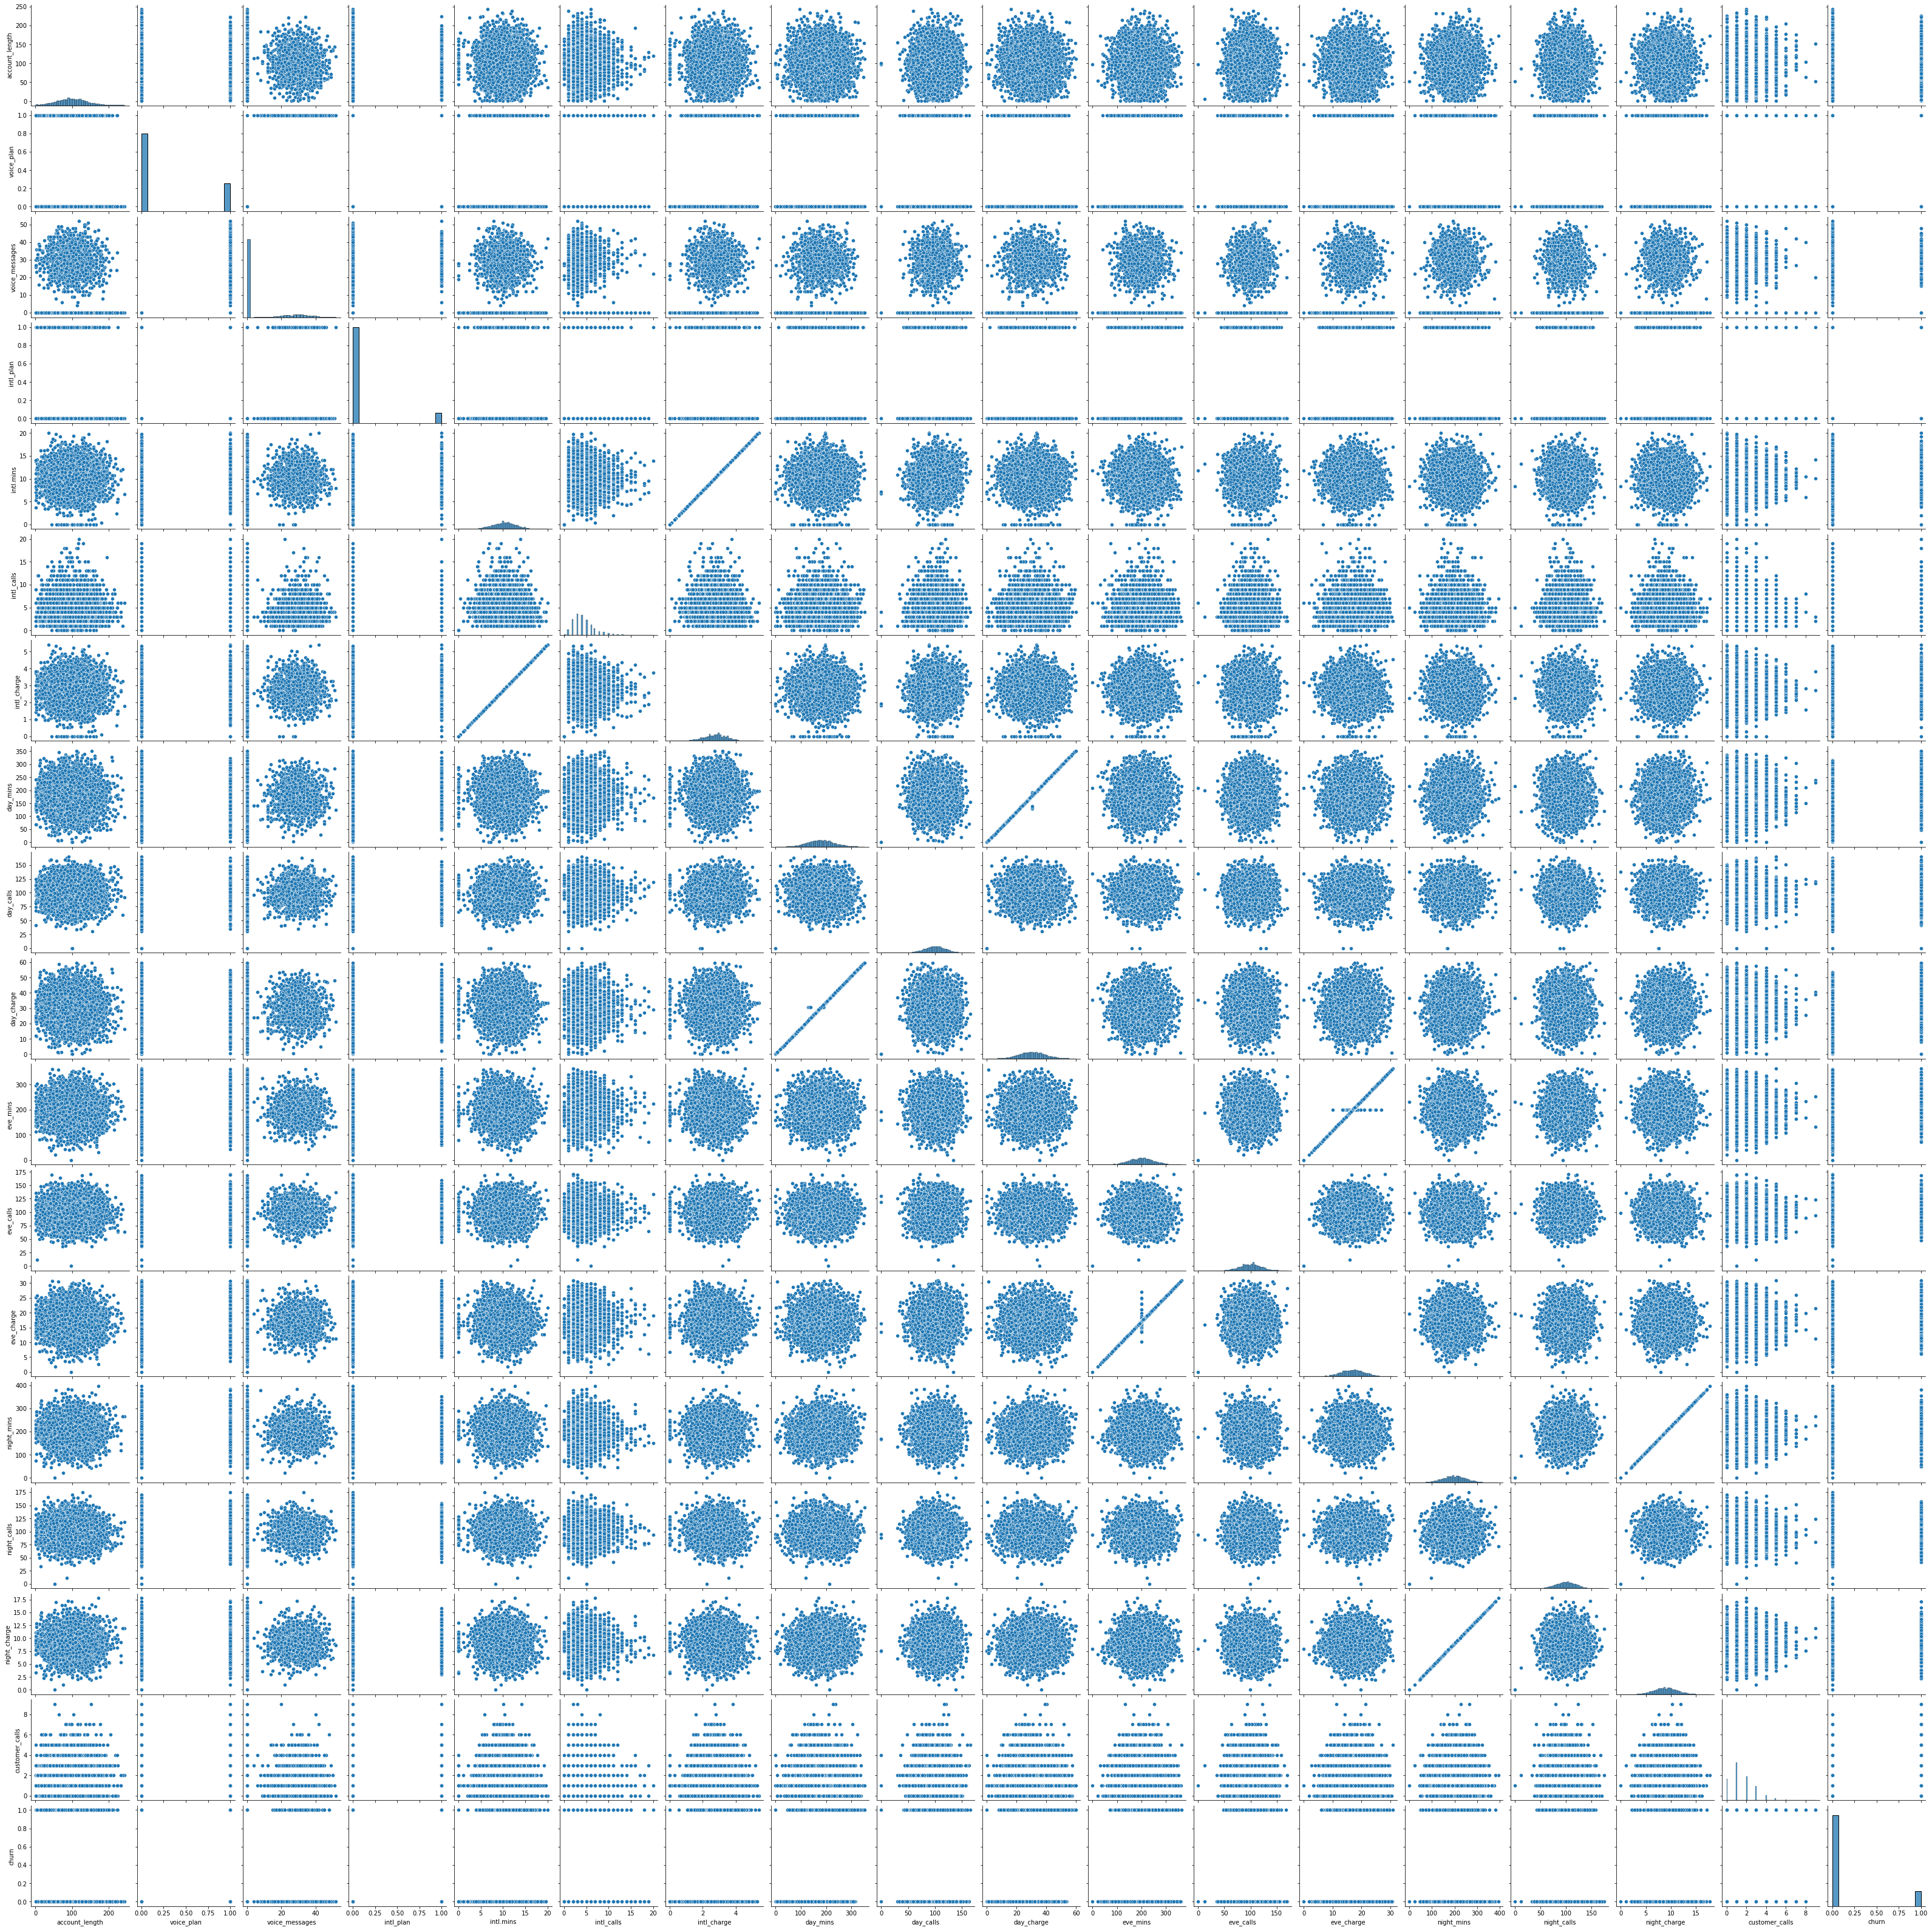

In [26]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(churn2)


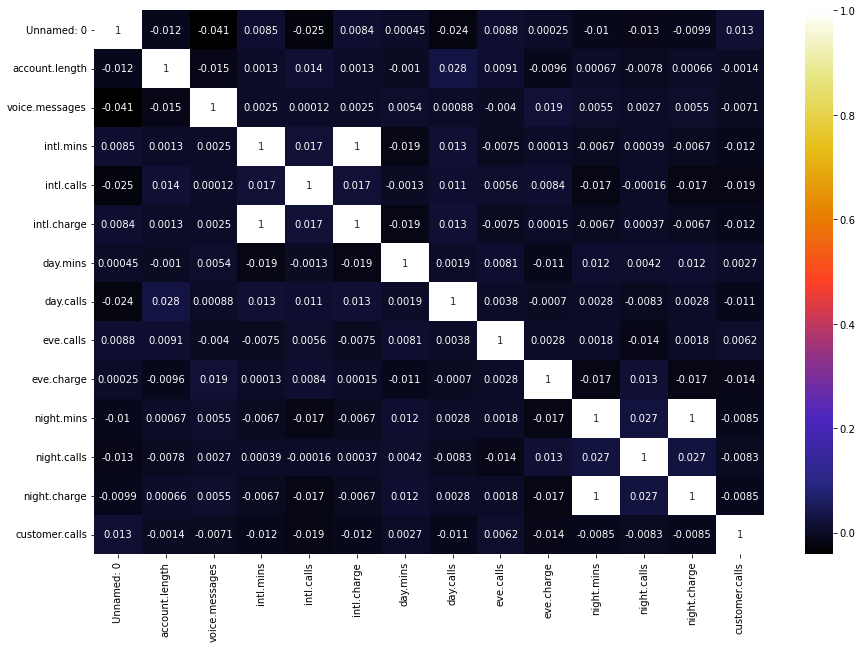

In [87]:
# Checking Multicollinearity in Numerical features Using HeatMap
plt.figure(figsize = (15,10))
sns.heatmap(churn.corr(), cmap="CMRmap", annot=True)
plt.show()

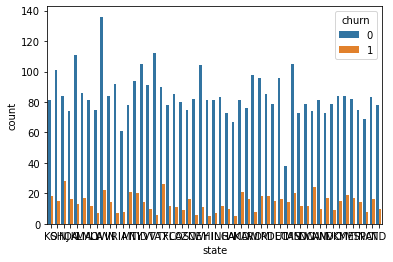

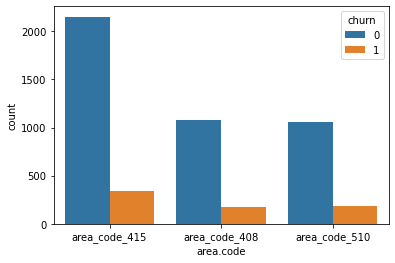

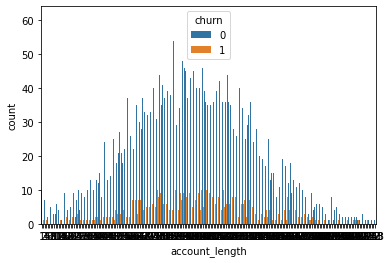

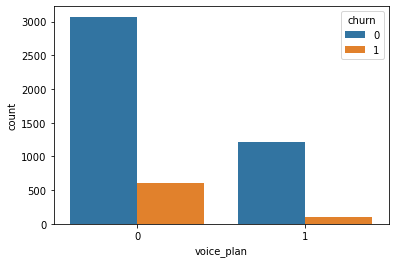

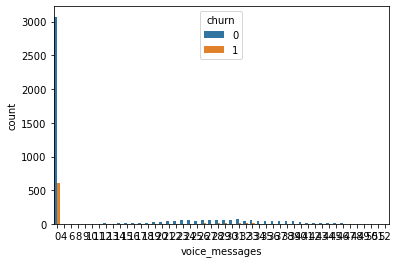

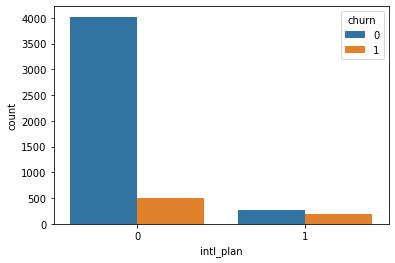

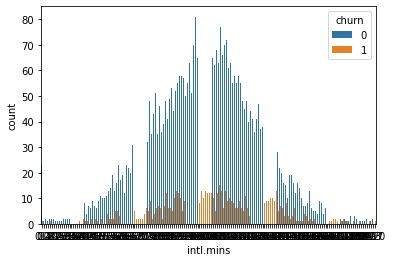

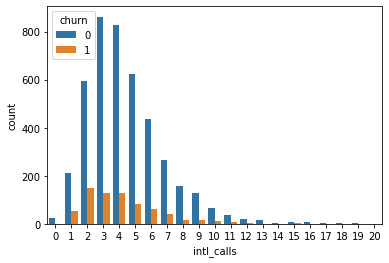

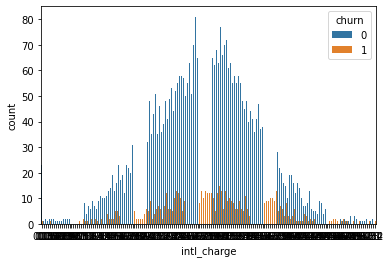

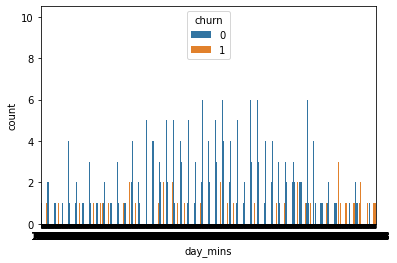

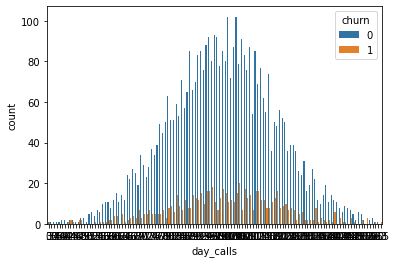

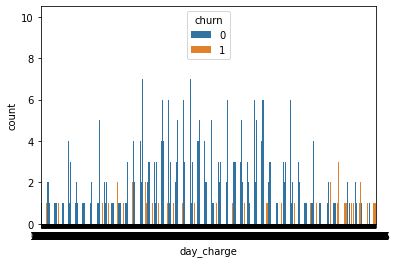

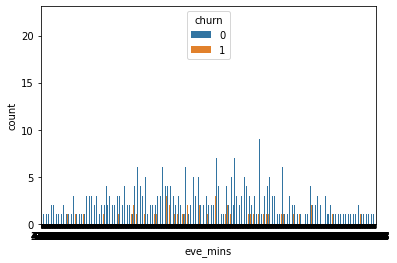

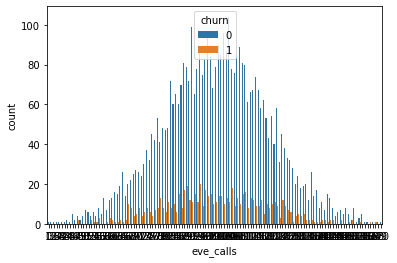

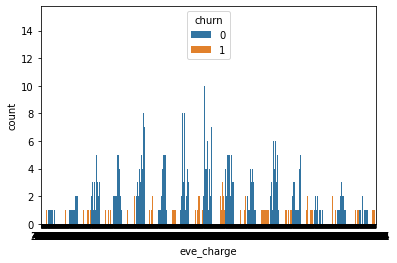

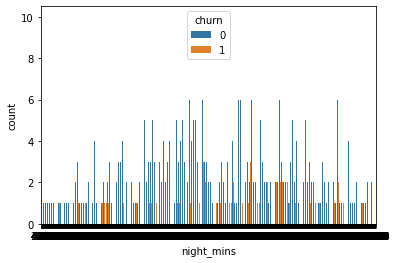

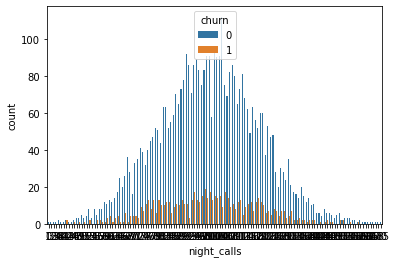

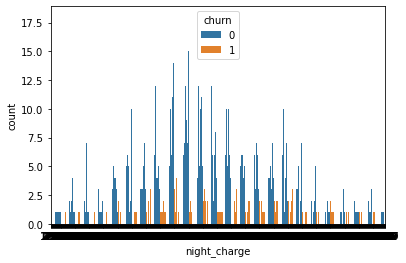

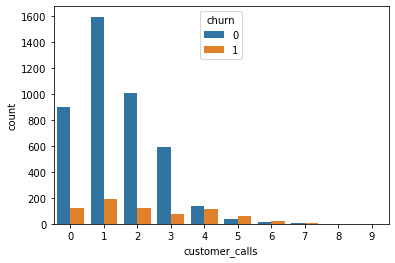

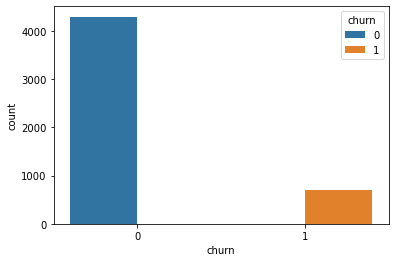

In [88]:
for i, predictor in enumerate(churn2.columns):
    plt.figure(i)
    sns.countplot(data=churn2, x=predictor, hue='churn')

account_length        AxesSubplot(0.125,0.71587;0.133621x0.16413)
voice_plan         AxesSubplot(0.285345,0.71587;0.133621x0.16413)
voice_messages      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
intl_plan          AxesSubplot(0.606034,0.71587;0.133621x0.16413)
intl.mins          AxesSubplot(0.766379,0.71587;0.133621x0.16413)
intl_calls           AxesSubplot(0.125,0.518913;0.133621x0.16413)
intl_charge       AxesSubplot(0.285345,0.518913;0.133621x0.16413)
day_mins           AxesSubplot(0.44569,0.518913;0.133621x0.16413)
day_calls         AxesSubplot(0.606034,0.518913;0.133621x0.16413)
day_charge        AxesSubplot(0.766379,0.518913;0.133621x0.16413)
eve_mins             AxesSubplot(0.125,0.321957;0.133621x0.16413)
eve_calls         AxesSubplot(0.285345,0.321957;0.133621x0.16413)
eve_charge         AxesSubplot(0.44569,0.321957;0.133621x0.16413)
night_mins        AxesSubplot(0.606034,0.321957;0.133621x0.16413)
night_calls       AxesSubplot(0.766379,0.321957;0.133621x0.16413)
night_char

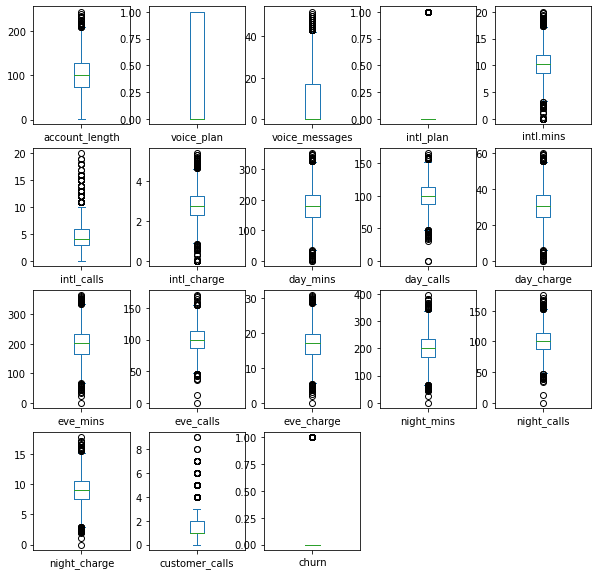

In [89]:
churn2.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'voice_plan'}>,
        <AxesSubplot:title={'center':'voice_messages'}>,
        <AxesSubplot:title={'center':'intl_plan'}>],
       [<AxesSubplot:title={'center':'intl.mins'}>,
        <AxesSubplot:title={'center':'intl_calls'}>,
        <AxesSubplot:title={'center':'intl_charge'}>,
        <AxesSubplot:title={'center':'day_mins'}>],
       [<AxesSubplot:title={'center':'day_calls'}>,
        <AxesSubplot:title={'center':'day_charge'}>,
        <AxesSubplot:title={'center':'eve_mins'}>,
        <AxesSubplot:title={'center':'eve_calls'}>],
       [<AxesSubplot:title={'center':'eve_charge'}>,
        <AxesSubplot:title={'center':'night_mins'}>,
        <AxesSubplot:title={'center':'night_calls'}>,
        <AxesSubplot:title={'center':'night_charge'}>],
       [<AxesSubplot:title={'center':'customer_calls'}>,
        <AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]

<Figure size 2160x1440 with 0 Axes>

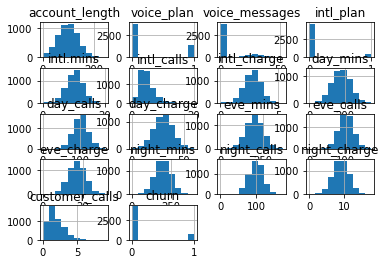

In [90]:
plt.figure(figsize=(30,20))
churn2.hist()

In [56]:
#Extracting cat feature from the dataset
num_feature = [feature for feature in churn.columns if churn[feature].dtypes != 'O']
num_feature

['Unnamed: 0',
 'account.length',
 'voice.messages',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls']

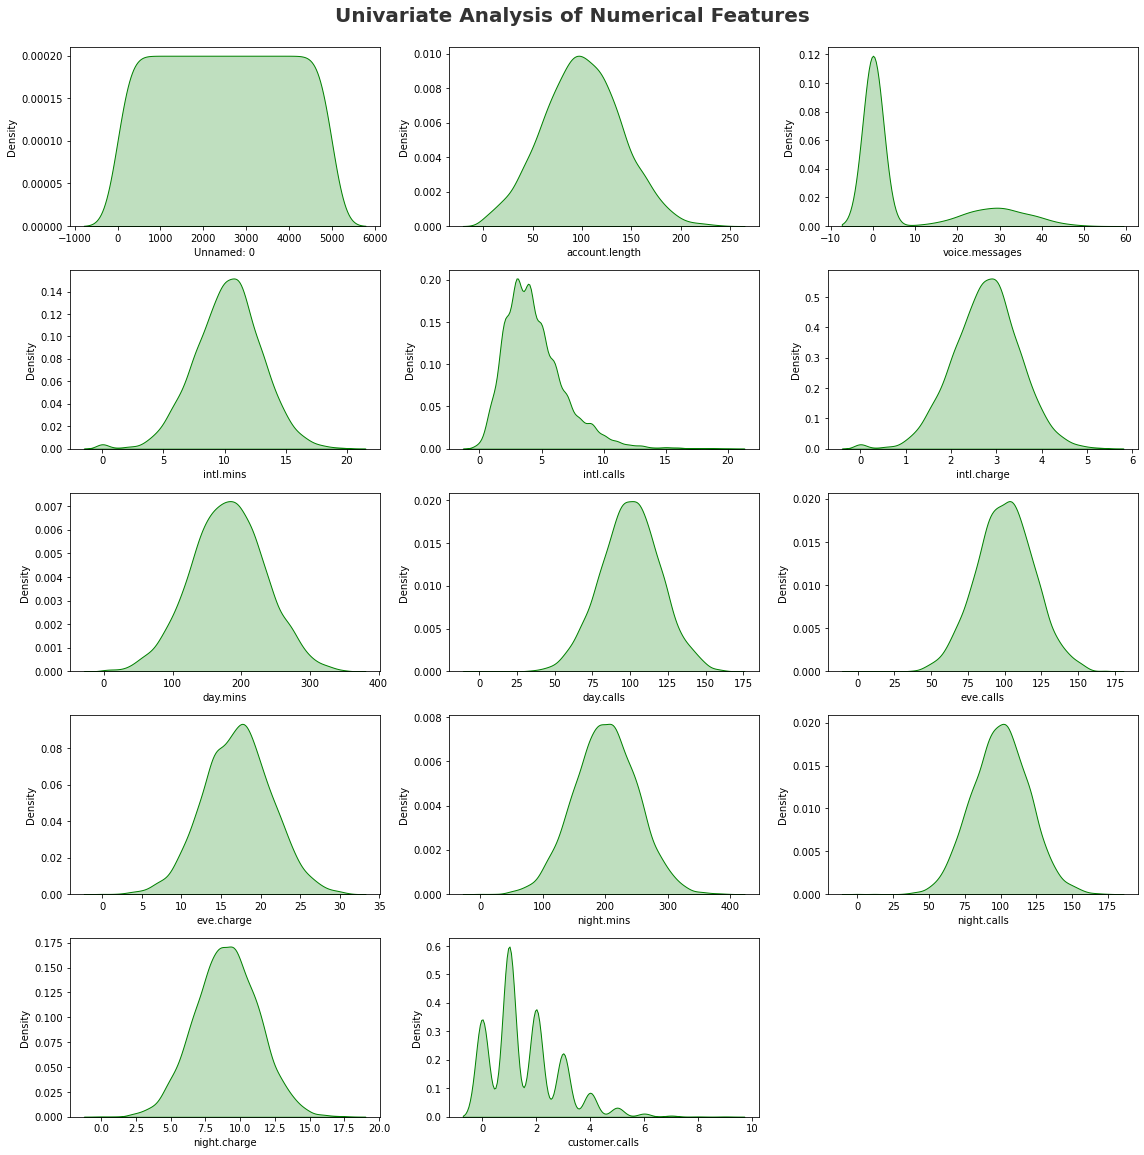

In [25]:
plt.figure(figsize=(16, 16))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=churn[num_feature[i]],shade=True, color='g')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

In [26]:
Top_10_state = churn2['state'].value_counts().head(10)
Top_10_state

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
Name: state, dtype: int64

In [27]:
Top_10_state_intlcalls =Top_10_state.index
Top_10_state_intlcalls


Index(['WV', 'MN', 'AL', 'ID', 'VA', 'OH', 'TX', 'WY', 'NY', 'OR'], dtype='object')

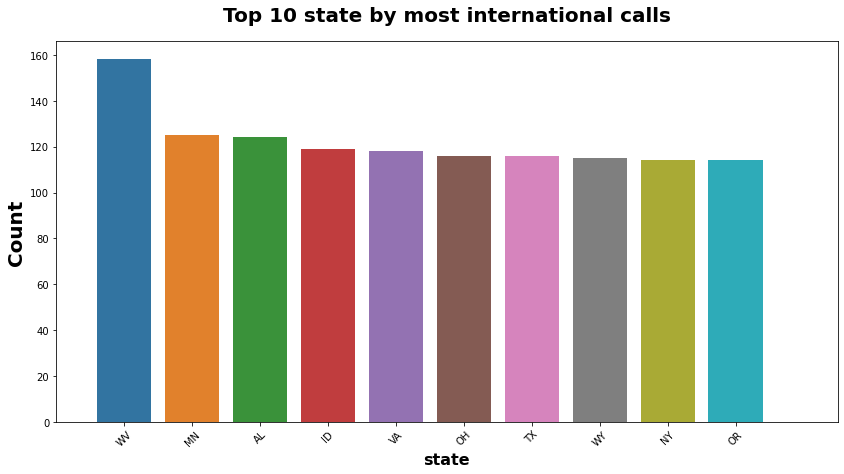

In [28]:
plt.subplots(figsize=(14,7))
sns.countplot(x="state", data=churn2,order = Top_10_state_intlcalls)
plt.title("Top 10 state by most international calls", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("state", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

# Check the mean international calls for state WV which have highest number of international calls

In [29]:
WV = churn2[churn2['state'] == 'WV']['intl_calls'].mean()
print(f"state WV has average {round(WV)} international calls every month ")

state WV has average 4 international calls every month 


In [30]:
churn2.columns

Index(['state', 'area.code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl.mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

In [19]:
International_details = churn2.groupby('state')['intl.mins', 'intl_calls', 'intl_charge'].sum().reset_index()
International_details

state  intl.mins  intl_calls  intl_charge
0     AK      711.5         335       192.15
1     AL     1291.2         558       348.65
2     AR      933.9         437       252.16
3     AZ      938.5         423       253.44
4     CA      518.7         226       140.09
5     CO      938.8         416       253.52
6     CT     1027.2         403       277.35
7     DC      925.3         349       249.90
8     DE      997.0         397       269.31
9     FL      920.0         382       248.44
10    GA      869.3         358       234.77
11    HI      889.0         420       240.08
12    IA      670.6         291       181.10
13    ID     1256.6         553       339.35
14    IL      883.0         347       238.46
15    IN      979.0         400       264.36
16    KS     1080.8         437       291.84
17    KY     1063.0         405       287.05
18    LA      789.2         378       213.18
19    MA     1016.5         475       274.53
20    MD     1076.3         452       290.65
21    ME     1032.7         449       278.90
22    MI     1115.7         491       301.25
23    MN     1279.1         526       345.42
24    MO      917.4         465       247.75
25    MS     1041.9         429       281.38
26    MT     1046.1         452       282.48
27    NC      912.5         400       246.42
28    ND      892.8         415       241.11
29    NE      922.9         361       249.25
30    NH      973.5         423       262.91
31    NJ     1192.3         511       322.01
32    NM      951.7         422       257.07
33    NV      920.8         391       248.61
34    NY     1127.2         519       304.34
35    OH     1191.5         494       321.76
36    OK      947.7         419       255.99
37    OR     1180.6         483       318.83
38    PA      791.5         309       213.69
39    RI      999.9         433       270.01
40    SC      881.9         381       238.18
41    SD      851.9         393       230.05
42    TN      927.2         395       250.38
43    TX     1205.0         492       325.38
44    UT     1121.1         515       302.72
45    VA     1220.4         564       329.57
46    VT     1024.6         486       276.69
47    WA      969.0         450       261.71
48    WI     1045.7         431       282.38
49    WV     1647.3         701       444.88
50    WY     1201.6         534       324.48

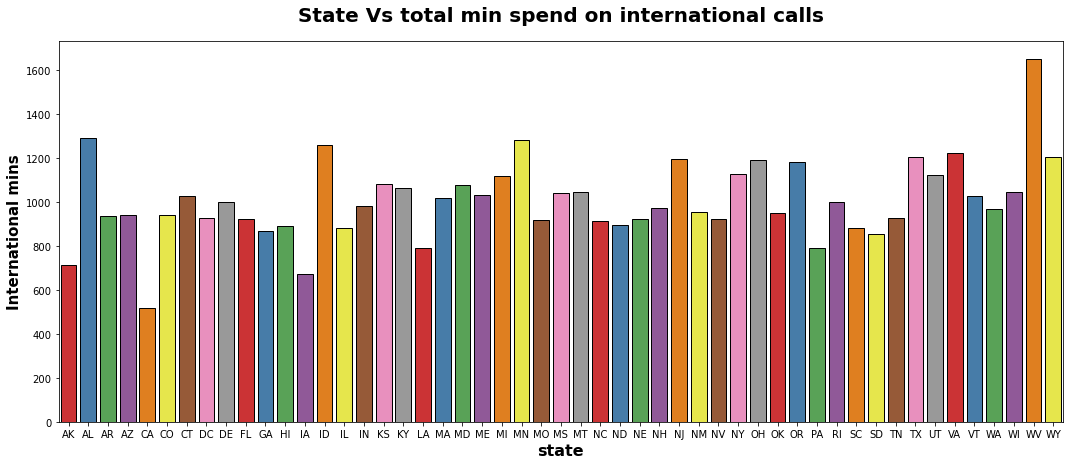

In [38]:
plt.subplots(figsize=(18,7))
sns.barplot(x=International_details.state, y=International_details['intl.mins'],ec = "black",palette="Set1")
plt.title("State Vs total min spend on international calls", weight="bold",fontsize=20, pad=20)
plt.ylabel("International mins", weight="bold", fontsize=15)
plt.xlabel("state", weight="bold", fontsize=16)

plt.show()

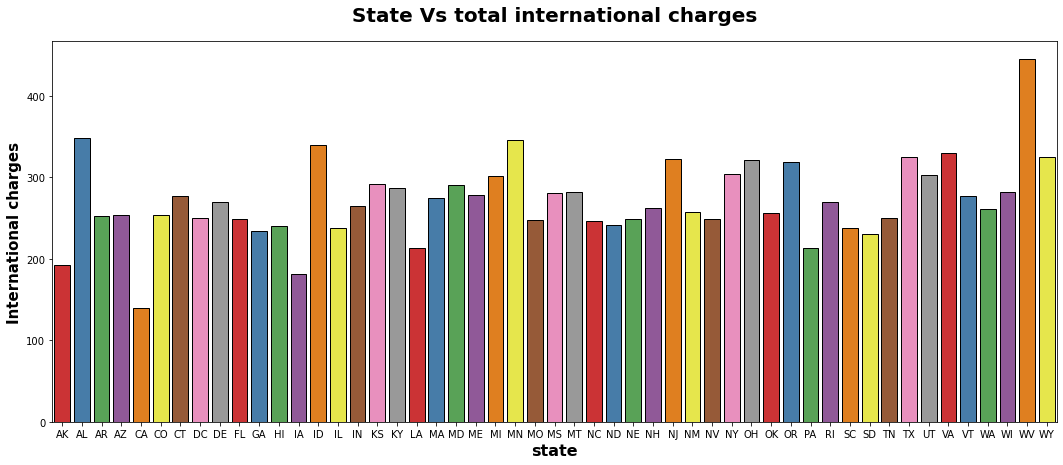

In [39]:
plt.subplots(figsize=(18,7))
sns.barplot(x=International_details.state, y=International_details['intl_charge'],ec = "black",palette="Set1")
plt.title("State Vs total international charges", weight="bold",fontsize=20, pad=20)
plt.ylabel("International charges", weight="bold", fontsize=15)
plt.xlabel("state", weight="bold", fontsize=16)

plt.show()

<AxesSubplot:xlabel='state', ylabel='Count'>

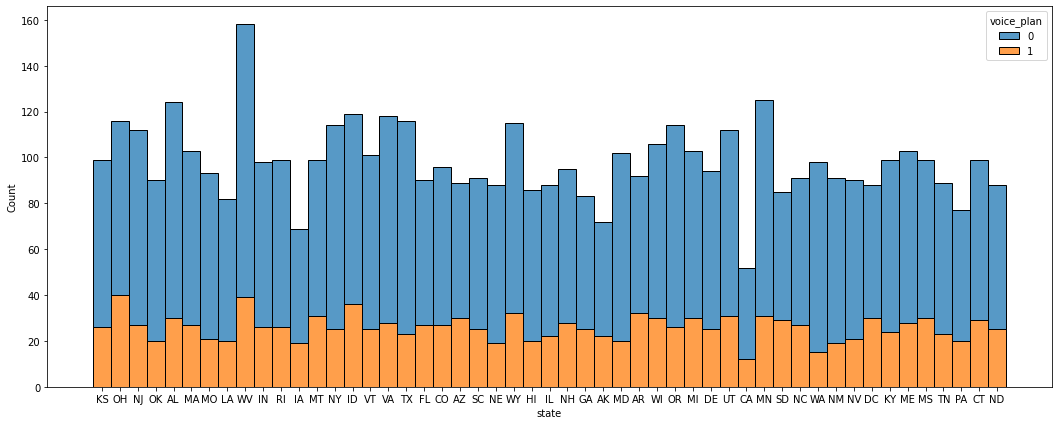

In [40]:
plt.subplots(figsize=(18,7))
sns.histplot(data=churn2, x="state", hue="voice_plan", multiple="stack")

<AxesSubplot:xlabel='area.code', ylabel='intl.mins'>

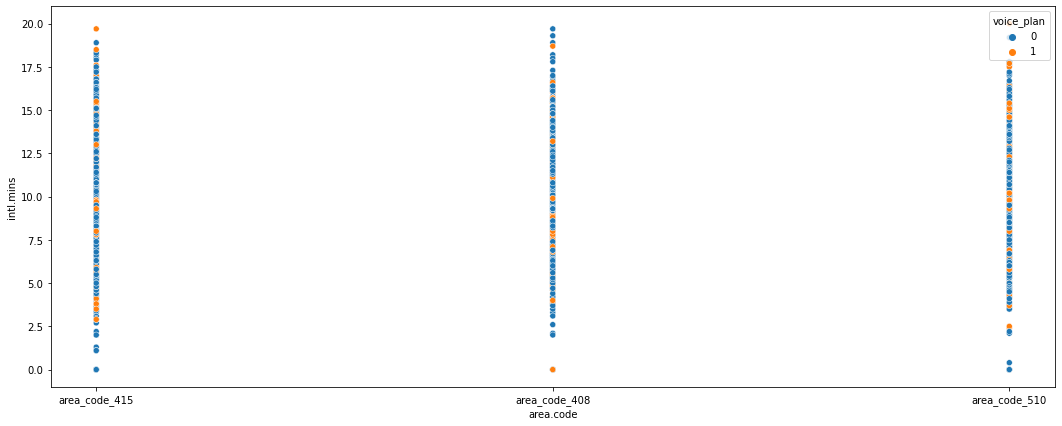

In [41]:
plt.subplots(figsize=(18,7))
sns.scatterplot(x=churn2['area.code'], y=churn2['intl.mins'], hue=churn2['voice_plan'])

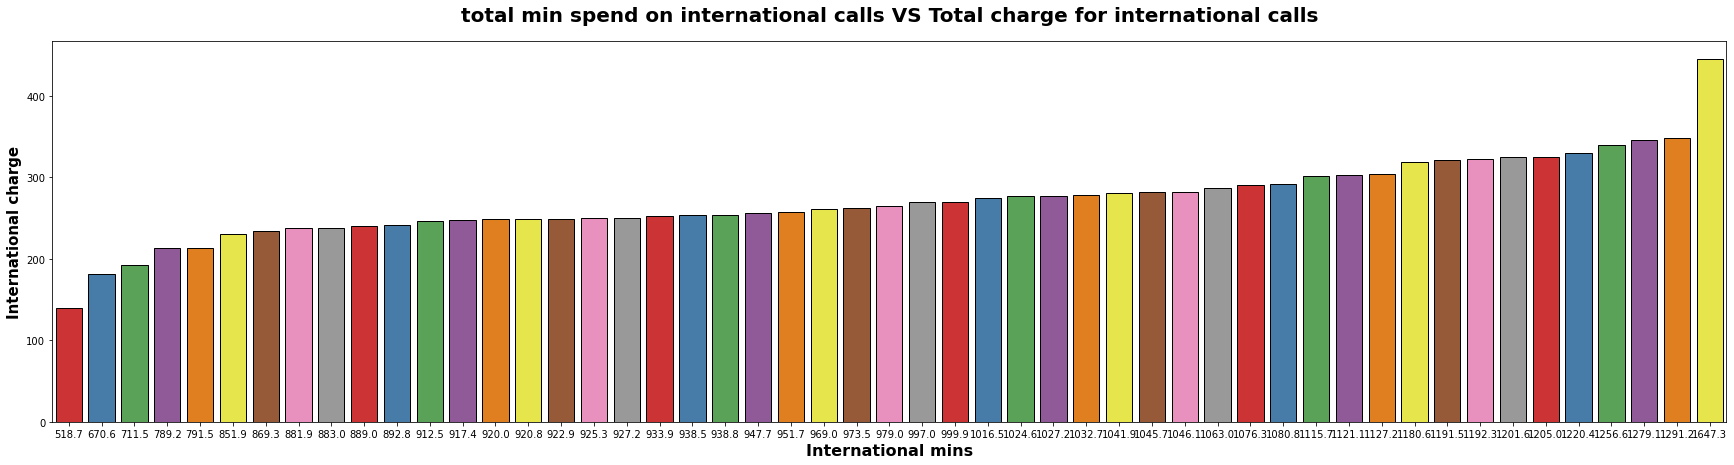

In [42]:
plt.subplots(figsize=(30,7))
sns.barplot(x=International_details['intl.mins'], y=International_details['intl_charge'],ec = "black",palette="Set1")
plt.title("total min spend on international calls VS Total charge for international calls", weight="bold",fontsize=20, pad=20)
plt.ylabel("International charge", weight="bold", fontsize=15)
plt.xlabel("International mins", weight="bold", fontsize=16)

plt.show()

In [43]:
churn2['TotalDaysMins'] = churn2['day_mins']+churn2['eve_mins']+churn2['night_mins']
churn2['TotalCharge'] = churn2['day_charge']+churn2['eve_charge']+churn2['night_charge']
churn2['TotalDaysCalls'] = churn2['day_calls']+churn2['eve_calls']+churn2['night_calls']

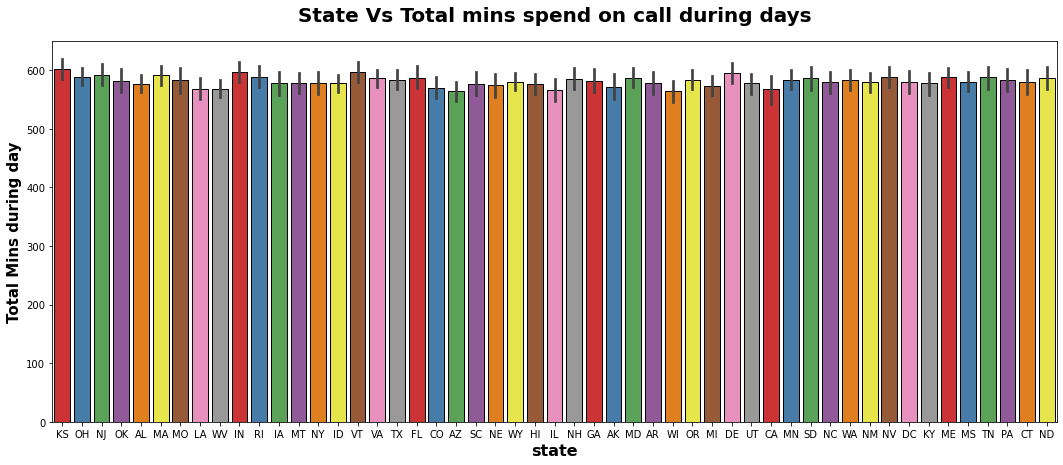

In [44]:
plt.subplots(figsize=(18,7))
sns.barplot(x=churn2['state'], y=churn2['TotalDaysMins'],ec = "black",palette="Set1")
plt.title("State Vs Total mins spend on call during days", weight="bold",fontsize=20, pad=20)
plt.ylabel("Total Mins during day", weight="bold", fontsize=15)
plt.xlabel("state", weight="bold", fontsize=16)

plt.show()

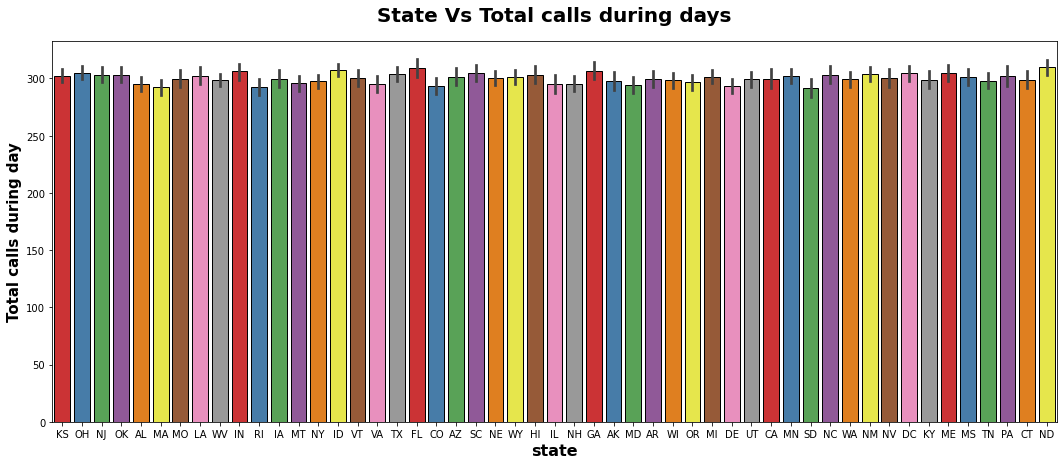

In [45]:
plt.subplots(figsize=(18,7))
sns.barplot(x=churn2['state'], y=churn2['TotalDaysCalls'],ec = "black",palette="Set1")
plt.title("State Vs Total calls during days", weight="bold",fontsize=20, pad=20)
plt.ylabel("Total calls during day", weight="bold", fontsize=15)
plt.xlabel("state", weight="bold", fontsize=16)

plt.show()

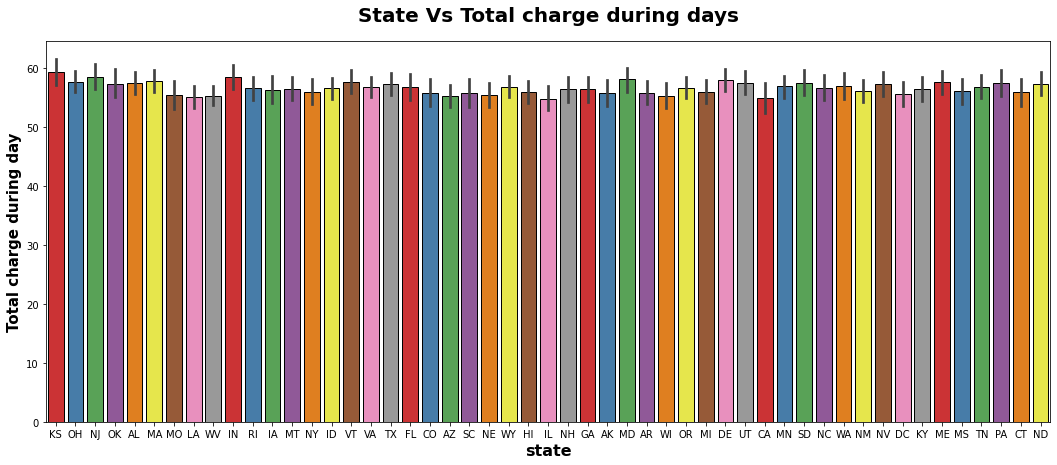

In [46]:
plt.subplots(figsize=(18,7))
sns.barplot(x=churn2['state'], y=churn2['TotalCharge'],ec = "black",palette="Set1")
plt.title("State Vs Total charge during days", weight="bold",fontsize=20, pad=20)
plt.ylabel("Total charge during day", weight="bold", fontsize=15)
plt.xlabel("state", weight="bold", fontsize=16)

plt.show()

In [47]:
import plotly.express as px
fig = px.strip(churn2, x="day_calls", y="churn", orientation="h", color='voice_plan')
fig.show()

# Splitting the data into train and test to avoid overfitting

In [57]:
# Balancing dataset
X = churn2.drop(['state','area.code','churn'], axis='columns')
y = churn2['churn']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5,stratify=y)

In [59]:
X_train.shape

(3500, 17)

In [60]:
X_test.shape

(1500, 17)

In [61]:
X_train[:10]

account_length  voice_plan  voice_messages  intl_plan  intl.mins  \
2032             151           0               0          0       13.2   
3980              55           0               0          0       10.9   
1481             129           1              34          0       14.8   
2502             115           0               0          0       16.4   
3164              52           0               0          0       11.0   
3819             117           0               0          0        7.5   
3522             176           1              31          0       10.4   
2616             165           1              33          0       16.0   
4206              92           0               0          0        8.2   
4171              36           1              19          1       10.5   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
2032          10         3.56     118.9        128       20.21     278.3   
3980           2         2.94     181.3        100       30.82     200.5   
1481           9         4.00     204.5         79       34.77     132.8   
2502           5         4.43     178.7        114       30.38     271.0   
3164           5         2.97     204.4         97       34.75     273.2   
3819           3         2.03     234.8        118       39.92     211.7   
3522           4         2.81     167.0         93       28.39     174.1   
2616           3         4.32     111.6        140       18.97     213.3   
4206           3         2.21     160.5        113       27.29     287.3   
4171           1         2.84     171.9         96       29.22     198.4   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
2032         65       23.66       194.8           61          8.77   
3980        122       17.04       226.9           99         10.21   
1481        113       11.29       190.1          117          8.55   
2502         96       23.04       245.9           94         11.07   
3164        128       23.22       179.6          118          8.08   
3819        112       17.99       147.0           97          6.61   
3522        128       14.80       155.0          124          6.98   
2616        111       18.13       267.6          115         12.04   
4206        134       24.42       212.6           93          9.57   
4171        111       16.86       321.7           76         14.48   

      customer_calls  
2032               2  
3980               1  
1481               2  
2502               2  
3164               1  
3819               2  
3522               3  
2616               0  
4206               3  
4171               1

In [62]:
import tensorflow as tf
from tensorflow import keras
model =keras.Sequential([
    keras.layers.Dense(17,input_dim=17,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
110/110 [==============================] - 5s 3ms/step - loss: 3.8651 - accuracy: 0.7517
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 2.4035 - accuracy: 0.7586
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 1.6874 - accuracy: 0.7714
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 1.3001 - accuracy: 0.7897
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.9891 - accuracy: 0.7951
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7643 - accuracy: 0.8091
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.8254
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.8343
Epoch 9/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.8331
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4246 - accura

In [63]:
model.evaluate(X_test,y_test)

47/47 [==============================] - 3s 2ms/step - loss: 0.3521 - accuracy: 0.8613


[0.3521265983581543, 0.8613333106040955]

In [64]:
yp=model.predict(X_test)
yp[:5]

47/47 [==============================] - 0s 2ms/step


array([[0.70338696],
       [0.2549755 ],
       [0.0402186 ],
       [0.49895555],
       [0.28204635]], dtype=float32)

In [65]:
y_test[:5]

1862    1
234     0
2019    0
2367    0
2088    0
Name: churn, dtype: int64

In [66]:
y_pred=[]
for element in yp :
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [67]:
y_pred[:15]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [103]:
y_train.value_counts()

0    3005
1     495
Name: churn, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1288
           1       1.00      0.03      0.06       212

    accuracy                           0.86      1500
   macro avg       0.93      0.51      0.49      1500
weighted avg       0.88      0.86      0.80      1500



Text(69.0, 0.5, 'Truth')

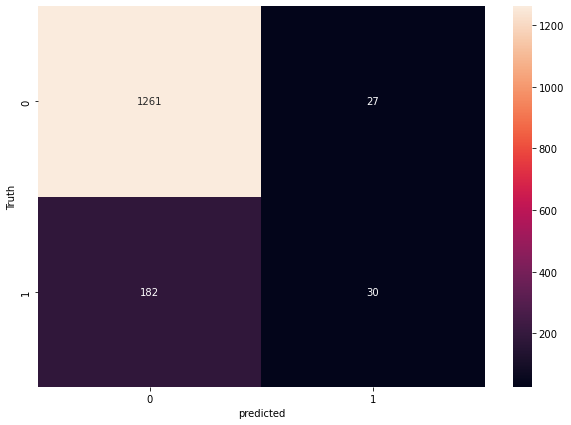

In [55]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [56]:
# Accuracy
(1261+30)/(1261+27+182+30)

0.8606666666666667

In [57]:
# precision for 0:i.e precision for customers who did not churn
(1261/(1261+182),2)

(0.8738738738738738, 2)

In [58]:
# precision for 1:i.e precision for customers who did not churned
(27/(27+30))

0.47368421052631576

In [59]:
# recall for 0:
(1261/(1261+27),2)

(0.9790372670807453, 2)

In [60]:
# recall for 1:
(30/(30+182))

0.14150943396226415

# Feature Selection

In [53]:
# Apply multiple Linear Regression Model 
from sklearn.ensemble import GradientBoostingClassifier
lreg = GradientBoostingClassifier() 
lreg.fit(X_train, y_train)

GradientBoostingClassifier()

In [54]:
y_pred = lreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
model.feature_importances_

array([0.0033969 , 0.04787618, 0.02746955, 0.08948669, 0.05081146,
       0.0934831 , 0.05205238, 0.1681657 , 0.00292513, 0.13411577,
       0.07466957, 0.00160984, 0.06019994, 0.01293945, 0.00302992,
       0.00887398, 0.16889444])

In [63]:
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Features"] = X_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(model.feature_importances_).sort_values(ascending=False) 
lreg_coefficient

Features  Coefficient Estimate
0   account_length              0.003397
1       voice_plan              0.047876
2   voice_messages              0.027470
3        intl_plan              0.089487
4        intl.mins              0.050811
5       intl_calls              0.093483
6      intl_charge              0.052052
7         day_mins              0.168166
8        day_calls              0.002925
9       day_charge              0.134116
10        eve_mins              0.074670
11       eve_calls              0.001610
12      eve_charge              0.060200
13      night_mins              0.012939
14     night_calls              0.003030
15    night_charge              0.008874
16  customer_calls              0.168894

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Features'>

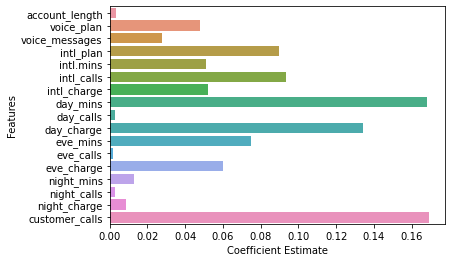

In [64]:
sns.barplot(x='Coefficient Estimate' , y='Features', data=lreg_coefficient)

In [116]:
# important feature using Extratreesregressor
from sklearn.ensemble import ExtraTreesRegressor
selection =  ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [117]:
print(selection.feature_importances_)

[0.02425029 0.039632   0.01079556 0.06628197 0.05563126 0.08482013
 0.04596883 0.13054169 0.02313964 0.13660453 0.06386565 0.02164896
 0.06752424 0.03625596 0.02373175 0.03718705 0.13212048]


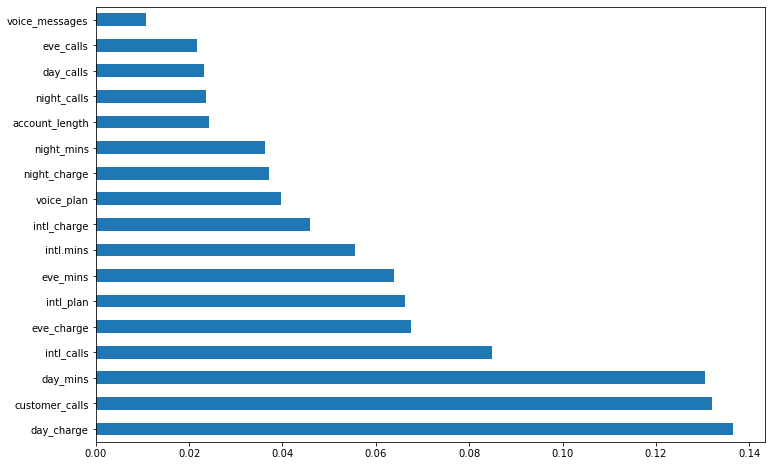

In [118]:
# plot graph of feature importance for better visualization
plt.figure(figsize=(12,8))
feat_importances =pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# SMOTE for Imbalanced Data 

# How to handle Imbalance Data ?

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

SMOTE: Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.

Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

In [23]:
X= churn2.drop(['state','area.code','churn'],axis='columns')
y=churn2['churn']

In [29]:
# Before balancing
y.value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [30]:
!pip install imbalanced-learn

In [31]:
# After balancing
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy ='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

0    4293
1    4293
Name: churn, dtype: int64

# Model Training

# Support Vector Machine

In [24]:
from sklearn.metrics import accuracy_score
#(accuracy_score(y_test,y_predict))
#pd.crosstab(y_test,y_predict)

In [68]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [34]:
y_pred = svm.predict(X_test)

In [35]:
# checking accuracy of test dataset
accuracy_score(y_test,y_pred)

0.8626666666666667

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1288
           1       1.00      0.03      0.06       212

    accuracy                           0.86      1500
   macro avg       0.93      0.51      0.49      1500
weighted avg       0.88      0.86      0.80      1500



# KNeighborsClassifier Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred1 = knn.predict(X_test)

In [71]:
# checking accuracy of test dataset
accuracy_score(y_test,y_pred1)

0.8786666666666667

# DecisionTree classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred2= dt.predict(X_test)

In [42]:
# checking accuracy of test dataset
accuracy_score(y_test,y_pred2)

0.9106666666666666

# RandomForest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_pred3= rf.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred3)

0.956

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1288
           1       0.95      0.72      0.82       212

    accuracy                           0.96      1500
   macro avg       0.95      0.86      0.90      1500
weighted avg       0.96      0.96      0.95      1500



# GradientBoosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [51]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [52]:
y_pred4= gbc.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred4)

0.948

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1288
           1       0.91      0.70      0.79       212

    accuracy                           0.95      1500
   macro avg       0.93      0.84      0.88      1500
weighted avg       0.95      0.95      0.95      1500



In [139]:
final_data =pd.DataFrame({'Models':['SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred),
                                                                       accuracy_score(y_test,y_pred1),
                                                                       accuracy_score(y_test,y_pred2),
                                                                       accuracy_score(y_test,y_pred3),
                                                                       accuracy_score(y_test,y_pred4),
                                                                       ]})

In [140]:
final_data

Models       ACC
0    SVC  0.862667
1    KNN  0.878667
2     DT  0.911333
3     RF  0.957333
4    GBC  0.947333

<AxesSubplot:xlabel='Models', ylabel='ACC'>

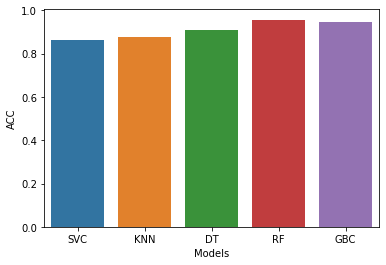

In [141]:
sns.barplot(final_data['Models'],final_data['ACC'])

# model validation 

# cross validation technique

# 1) K Fold cross validation

In [75]:
from sklearn.model_selection import KFold
model = RandomForestClassifier()
kfold_validation =KFold(10)

In [76]:
import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.95  0.956 0.96  0.964 0.96  0.948 0.974 0.95  0.954 0.984]
0.96


# 2)stratified K-fold cross validation

In [81]:
from sklearn.model_selection import StratifiedKFold
kfold_validation =KFold(10)
skfold=StratifiedKFold(n_splits=5)
model=GradientBoostingClassifier()
score= cross_val_score(model,X,y,cv=kfold_validation)
print(np.mean(score))

0.9544


In [82]:
score

array([0.958, 0.95 , 0.958, 0.956, 0.952, 0.942, 0.966, 0.942, 0.946,
       0.974])

In [ ]:
# K-fold validation using GradientBoostingClassifier

In [58]:
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [62]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
kfold = KFold(n_splits = 10)
results = cross_val_score(model, X, y, cv = kfold)

In [60]:
k_range = range(1, 20)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    gbc = GradientBoostingClassifier()
    scores = cross_val_score(gbc, X, y, cv=5)
    k_scores.append(scores.mean())

In [61]:
k_scores

[0.9558,
 0.9555999999999999,
 0.9555999999999999,
 0.9558,
 0.9558,
 0.9558,
 0.9558,
 0.9558,
 0.9558,
 0.9558,
 0.9558,
 0.9558,
 0.9555999999999999,
 0.9555999999999999,
 0.9558,
 0.9555999999999999,
 0.9555999999999999,
 0.9558,
 0.9558]

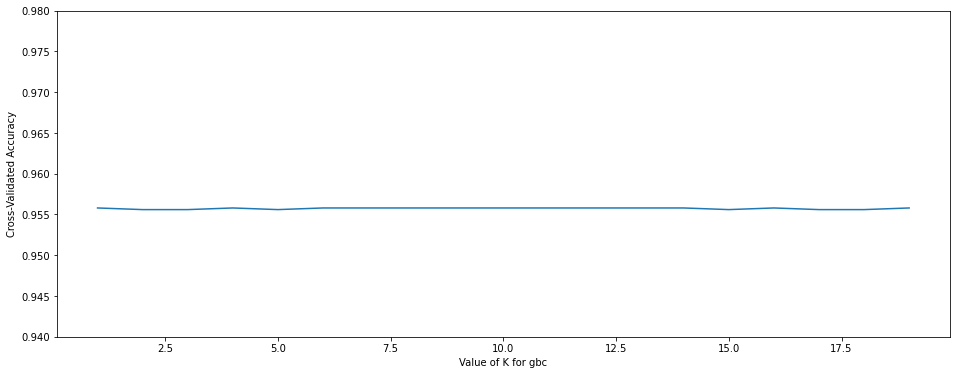

In [123]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for gbc')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.94,0.98)
plt.show()

In [124]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,20),
                            'Accuracy' : k_scores})
df_accuracy

Value of k  Accuracy
0            1    0.9558
1            2    0.9556
2            3    0.9556
3            4    0.9558
4            5    0.9556
5            6    0.9558
6            7    0.9558
7            8    0.9558
8            9    0.9558
9           10    0.9558
10          11    0.9558
11          12    0.9558
12          13    0.9558
13          14    0.9558
14          15    0.9556
15          16    0.9558
16          17    0.9556
17          18    0.9556
18          19    0.9558

In [ ]:
# 3) Leave-One-Out Cross-Validation

In [58]:
# loocv to automatically evaluate the performance of a random forest classifierfrom numpy import mean
from numpy import std
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# create dataset
X, y = make_blobs(n_samples=100, random_state=1)
# create loocv procedure
cv = LeaveOneOut()
# create model
model = RandomForestClassifier(random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.030)


In [66]:
import pickle
pickle.dump(rf,open('pipe.pkl','wb'))